<a href="https://colab.research.google.com/github/AimjGuytidy/Neural_network/blob/main/neuro_network_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_circles
%matplotlib inline

In [ ]:
#let's create a classification dataset
maky = make_circles(n_samples=1000,noise=0.03,random_state=42)
maky

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
X,y = maky

In [ ]:
#let's visualize our data
#first we create a dataframe
df = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
df.head(3)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1


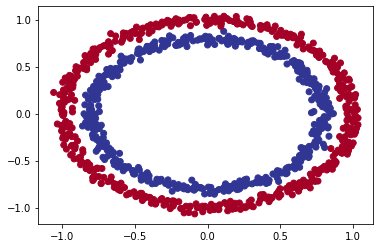

In [ ]:
#finally we plot our data
plt.scatter(df["X0"],df["X1"],c=y,cmap="RdYlBu")

### Create our first classification model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Let's split our data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed(42)
#create our first model
model = tf.keras.Sequential([
                            #  tf.keras.layers.Input(shape=(800,2)),
                            #  tf.keras.layers.Dense(50,activation="sigmoid"),
                            #  tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(4,activation="tanh"),
                             tf.keras.layers.Dense(2,activation="tanh"),
                             tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
              # optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
#fit the model
history = model.fit(X_train,y_train,epochs=50,batch_size=10)

Epoch 1/50
80/80 [==============================] - 1s 1ms/step - loss: 0.9109 - accuracy: 0.4963
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5337
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.5512
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.5462
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.6662
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.6975
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8400
Epoch 8/50
80/80 [==============================] - 0s 1ms/step - loss: 4.5198 - accuracy: 0.6075
Epoch 9/50
80/80 [==============================] - 0s 1ms/step - loss: 5.1541 - accuracy: 0.5188
Epoch 10/50
80/80 [==============================] - 0s 1ms/step - loss: 3.2915 - accuracy: 0.5763
Epoch 11/50
80/80 [

In [ ]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4650


[0.6932445764541626, 0.4650000035762787]

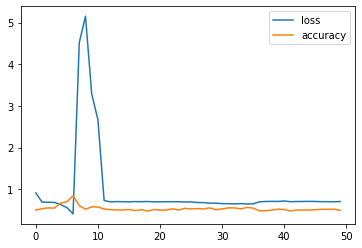

In [ ]:
pd.DataFrame(history.history).plot()
plt.legend()

In [ ]:
tf.random.set_seed(42)
#create our first model
model1 = tf.keras.Sequential([
                            #  tf.keras.layers.Input(shape=(800,2)),
                            #  tf.keras.layers.Dense(50,activation="sigmoid"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(1,activation="softmax")
])
#compile the model
model1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              # optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
#fit the model
model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.8236 - accuracy: 0.4913
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.4913
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.4913
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.4913
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.4913
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.4913
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.4913
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.4913
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.4913
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.4913
Epoch 11/

In [ ]:
model1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.5350


[0.17371265590190887, 0.5350000262260437]

###Improving our model

In [ ]:
tf.constant(X)

<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])>

In [ ]:
y_pred = model.predict(X_test)

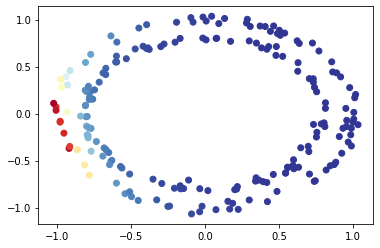

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap="RdYlBu")

watch vid 09!!

#####•1st we learn how to use meshgrid

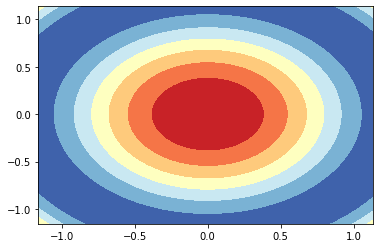

In [ ]:
#we use the train data as reference
x_1 = np.linspace(X_train[:,0].min()-0.1,X_train[:,0].max()+0.1,100)
y_1 = np.linspace(X_train[:,1].min()-0.1,X_train[:,1].max()+0.1,100)
x_grid,y_grid = np.meshgrid(x_1,y_1)
plt.contourf(x_grid,y_grid,np.sin(x_grid**2+y_grid**2),cmap='RdYlBu')

In [ ]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [ ]:
np.c_[np.arange(1,4),np.array([[1,2,3],[4,5,6],[4,5,6]])]

array([[1, 1, 2, 3],
       [2, 4, 5, 6],
       [3, 4, 5, 6]])

In [ ]:
np.c_[np.arange(1,4),np.array(['a','b','c'])]#this combine the arrays such that the first array is transposed and joined with the transposed secon array

array([['1', 'a'],
       ['2', 'b'],
       ['3', 'c']], dtype='<U21')

In [ ]:
np.array([[1,2,3],[4,5,6],[4,5,6]]).ravel() #turns it in a one dimension array(flattens the array)

array([1, 2, 3, 4, 5, 6, 4, 5, 6])

In [ ]:
np.array([[1,2,3],[4,5,6],[4,5,6]]).ndim

2

In [ ]:
np.array([1, 2, 3, 4, 5, 6, 4, 5, 6]).ndim

1

In [ ]:
y_grid

array([[-1.15673597, -1.15673597, -1.15673597, ..., -1.15673597,
        -1.15673597, -1.15673597],
       [-1.13357699, -1.13357699, -1.13357699, ..., -1.13357699,
        -1.13357699, -1.13357699],
       [-1.110418  , -1.110418  , -1.110418  , ..., -1.110418  ,
        -1.110418  , -1.110418  ],
       ...,
       [ 1.0896857 ,  1.0896857 ,  1.0896857 , ...,  1.0896857 ,
         1.0896857 ,  1.0896857 ],
       [ 1.11284469,  1.11284469,  1.11284469, ...,  1.11284469,
         1.11284469,  1.11284469],
       [ 1.13600368,  1.13600368,  1.13600368, ...,  1.13600368,
         1.13600368,  1.13600368]])

In [ ]:
x_grid

array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       ...,
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175],
       [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
         1.11054797,  1.13371175]])

In [ ]:
x_grid.shape,y_grid.shape,x_grid.ravel().shape

((100, 100), (100, 100), (10000,))

In [ ]:
#stack the grids together
x_stack = np.c_[x_grid.ravel(),y_grid.ravel()]
x_stack.shape

(10000, 2)

In [ ]:
y_train.max(),y_train.min(),y_train.argmax(),y_train.argmin()

(1, 0, 1, 0)

In [ ]:
y_preds = model.predict(x_stack)
y_preds

array([[0.25767553],
       [0.30261165],
       [0.34132254],
       ...,
       [0.49858826],
       [0.49858832],
       [0.49858832]], dtype=float32)

In [ ]:
y_preds.shape

(10000, 1)

In [ ]:
y_preds.shape[0]

10000

In [ ]:
y_preds.ravel().shape

(10000,)

In [ ]:
x_grid.shape

(100, 100)

In [ ]:
y_prepre = np.round(y_preds).reshape(x_grid.shape)
y_prepre.shape

(100, 100)

In [ ]:
y_prepre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(-1.1567359742693124, 1.1360036756154805)

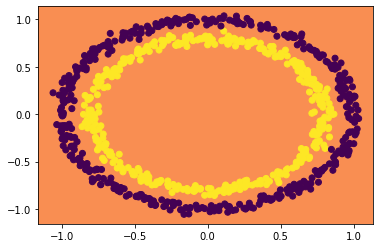

In [ ]:
plt.contourf(x_grid,y_grid,y_prepre,cmap='RdYlBu')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlim(X_train[:,0].min()-0.1,X_train[:,0].max()+0.1)
plt.ylim(X_train[:,1].min()-0.1,X_train[:,1].max()+0.1)

In [ ]:
X_train.max(),X_train.min()

(1.0360036756154805, -1.0595024599098635)

In [ ]:
len(y_preds[0])

1

Converting what we did in a function

In [ ]:
def plot_boundary(model,X,y):
  x_1=np.linspace(X[:,0].min()-0.1,X[:,0].max()+0.1,100)
  y_1=np.linspace(X[:,1].min()-0.1,X[:,1].max()+0.1,100)
  xx,yy=np.meshgrid(x_1,y_1) #creating a meshgrid
  x_in = np.c_[xx.ravel(),yy.ravel()]#2D stack of the created meshgrid flattened by ravel()
  y_predu = model.predict(x_in)#predicting our data
  if len(y_predu[0])>1:
    print("we have a multiclass classification")
    y_predu=np.argmax(y_predu,axis=1).reshape(xx.shape)
  else:
    print("we have a binary classification")
    y_predu=np.round(y_predu).reshape(xx.shape)
  plt.contourf(xx,yy,y_predu,cmap='RdYlBu')
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap='RdYlBu')
  plt.xlim(X[:,0].min()-0.1,X[:,0].max()+0.1)
  plt.ylim(X[:,1].min()-0.1,X[:,1].max()+0.1)

we have a binary classification


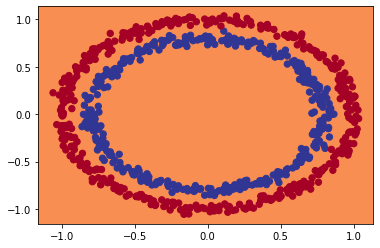

In [ ]:
plot_boundary(model1,X_train,y_train)

we have a binary classification


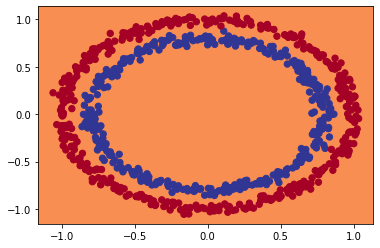

In [ ]:
plot_boundary(model,X_train,y_train)

we have a binary classification


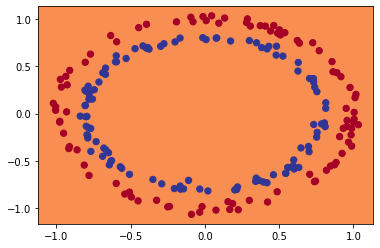

In [ ]:
plot_boundary(model,X_test,y_test)

In [ ]:
tf.random.set_seed(42)
#create model  
model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])                   
#compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#fit the model
model2.fit(X_train,y_train,epochs=100,verbose=0)

we have a binary classification


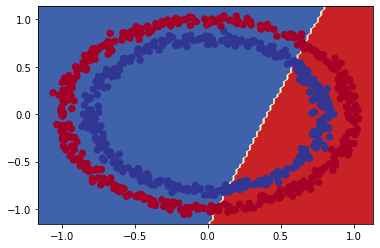

In [ ]:
plot_boundary(model2,X_train,y_train)

In [ ]:
#let's use model2 to predict regression data
#first generate data
tf.random.set_seed(42)
X = tf.range(0,1000,5)
y=tf.range(100,1100,5)
X_t = X[:150]
X_s = X[150:]
y_t = y[:150]
y_s = y[150:]

In [ ]:
tf.random.set_seed(42)
#create the model
model_l = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
#compile our model
model_l.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
#fit the model
model_l.fit(X_t,y_t,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

In [ ]:
model_l.evaluate(X_s,y_s)

2/2 [==============================] - 0s 5ms/step - loss: 57.8927 - mae: 57.8927


[57.892669677734375, 57.89266586303711]

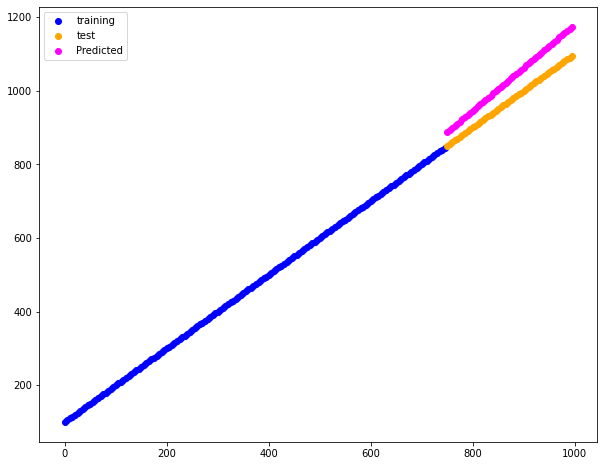

In [ ]:
y_prey = model_l.predict(X_s)
plt.figure(figsize=[10,8])
plt.scatter(X_t,y_t,c='blue',label="training")
plt.scatter(X_s,y_s,c='orange',label="test")
plt.scatter(X_s,y_prey,c='magenta',label="Predicted")
plt.legend()

###Non_linearity

In [ ]:
tf.random.set_seed(42)
#create the model
model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu")
                              # tf.keras.layers.Dense(1)
])
#compile the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#fit the model
history1=model4.fit(X_train,y_train,epochs=2040,verbose=0)

we have a multiclass classification


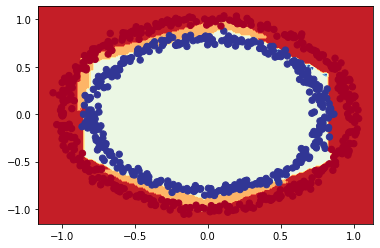

In [ ]:
plot_boundary(model4,X_train,y_train)

In [ ]:
model4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.4950


[0.04034266620874405, 0.4950000047683716]

In [ ]:
model4.evaluate(X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.5163


[0.042243894189596176, 0.5162500143051147]

In [ ]:
tf.random.set_seed(42)
#create our first model
model5 = tf.keras.Sequential([
                            #  tf.keras.layers.Input(shape=(800,2)),
                            #  tf.keras.layers.Dense(50,activation="sigmoid"),
                            #  tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(4,activation="tanh"),
                             tf.keras.layers.Dense(2,activation="tanh"),
                             tf.keras.layers.Dense(1)
])
#compile the model
model5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
              # optimizer = tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
#fit the model
history3 = model.fit(X_train,y_train,epochs=50,batch_size=10)

Epoch 1/50
80/80 [==============================] - 0s 1ms/step - loss: 0.7122 - accuracy: 0.5238
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.5038
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.7038 - accuracy: 0.4975
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5375
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.5375
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.5200
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5213
Epoch 8/50
80/80 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.4938
Epoch 9/50
80/80 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.5300
Epoch 10/50
80/80 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.5150
Epoch 11/50
80/80 [

In [ ]:
tf.random.set_seed(42)
#create the model
model4 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])
#compile the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#fit the model
history1=model4.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6892 - accuracy: 0.5113
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5150
Epoch 3/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6829 - accuracy: 0.5263
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.5238
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6807 - accuracy: 0.5250
Epoch 6/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5263
Epoch 7/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5163
Epoch 8/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5225
Epoch 9/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5362
Epoch 10/250
25/25 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5437
Epoch 11/

we have a binary classification


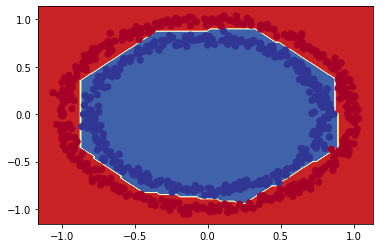

In [ ]:
plot_boundary(model4,X_train,y_train)

In [ ]:
model4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 1.0000


[0.05021443963050842, 1.0]

we have a binary classification


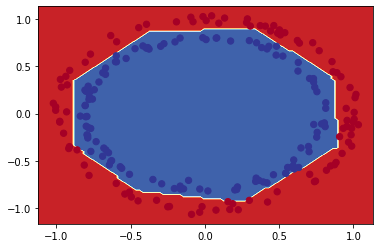

In [ ]:
plot_boundary(model4,X_test,y_test)

#### Sigmoid,Logit

In [ ]:
#first we define sigmoid and logit functions
def sigmoid(x):
  return 1/(1+tf.exp(-x))

def logit(x):
  return tf.math.log(x/np.abs(1-x))

In [ ]:
#generate our data
A = tf.cast(tf.range(-10,10),tf.float32)

In [ ]:
def relu(x):
  return np.maximum(0,x)

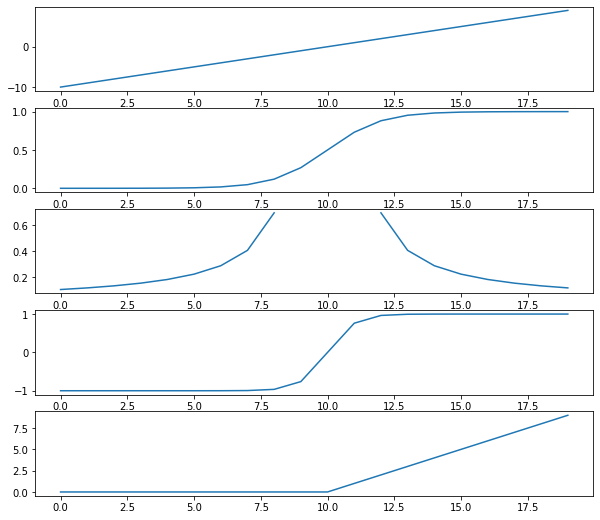

In [ ]:
#let's plot our diff functions
fig,ax=plt.subplots(nrows=5,figsize=[10,9])
ax[0].plot(A)
ax[1].plot(sigmoid(A))
ax[2].plot(logit(abs(A)))
ax[3].plot(tf.tanh(A))
ax[4].plot(relu(A))

finished 15!!!

<Figure size 720x648 with 0 Axes>

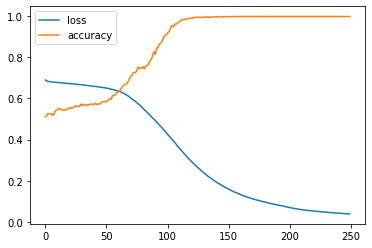

In [ ]:
#let's visualize the history variable we created
plt.figure(figsize=[10,9])
pd.DataFrame(history1.history).plot()

### Finding the best learning rate

In [ ]:
tf.random.set_seed(42)
cally = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5)
#create our model
model6 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])
#compile our model
model6.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])
#fit the model after creating a callback object
lr_call = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))#very helpful
history6 = model6.fit(X_train,y_train,epochs=100,callbacks=[lr_call,cally])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5088
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5088
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5088
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5088
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5138
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5125
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5113
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5125
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5163
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.5138
Epoch 11/

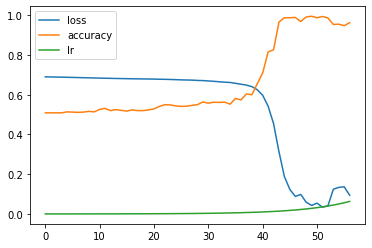

In [ ]:
pd.DataFrame(history6.history).plot()

Text(0, 0.5, 'Loss')

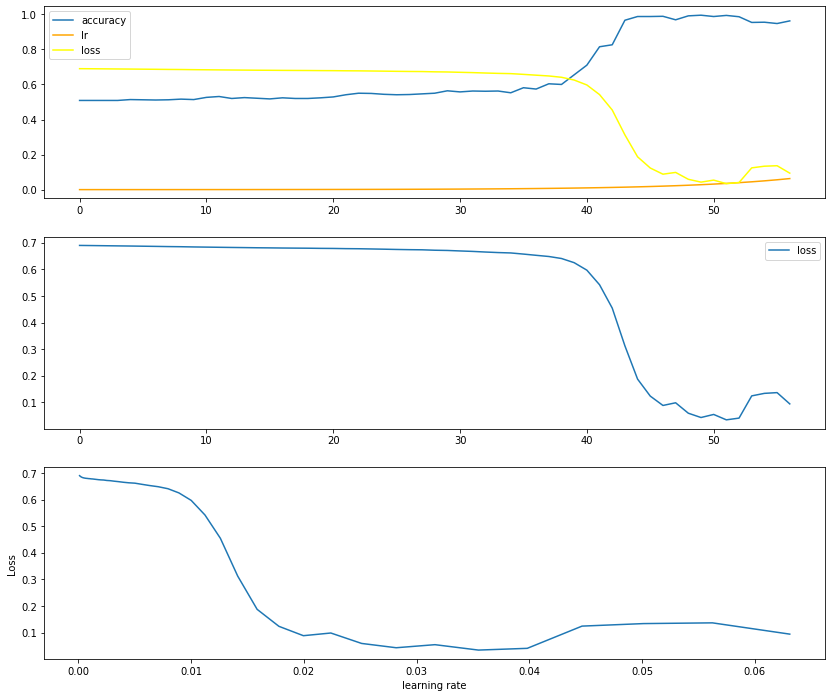

In [ ]:
#let's visualize
plt.figure(figsize=[14,12])
plt.subplot(3,1,1)
pd.DataFrame(history6.history)["accuracy"].plot()
pd.DataFrame(history6.history)["lr"].plot(c="orange")
pd.DataFrame(history6.history)["loss"].plot(c="yellow")
plt.legend()
plt.subplot(3,1,2)
pd.DataFrame(history6.history)["loss"].plot()
plt.legend()
plt.subplot(3,1,3)
plt.plot(pd.DataFrame(history6.history)["lr"],pd.DataFrame(history6.history)["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
#plt.legend()

No handles with labels found to put in legend.


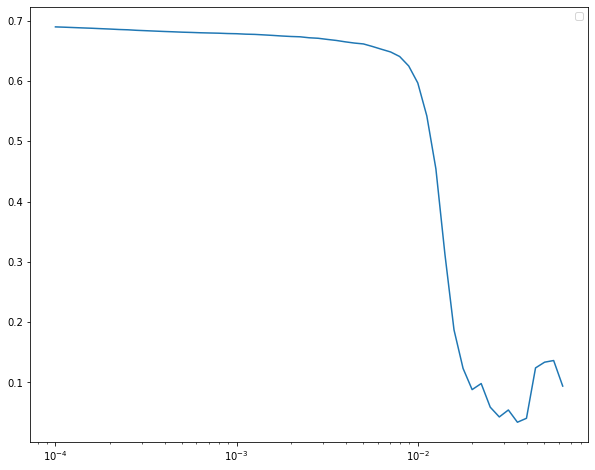

In [ ]:
#Using log plots
lr = 1e-4*10**(tf.range(100)/20)
plt.figure(figsize=[10,8])
plt.semilogx(lr[:57],history6.history["loss"])
plt.legend()

### Classification evaluation metrics

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_test,np.round(model6.predict(X_test)))
conf_mat

array([[82, 11],
       [11, 96]])

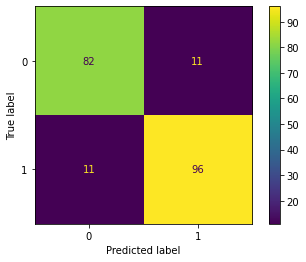

In [ ]:
disp = ConfusionMatrixDisplay(conf_mat,display_labels=[0,1])
disp.plot()

In [ ]:
import seaborn as sns

Text(0.5, 51.0, 'Predicted label')

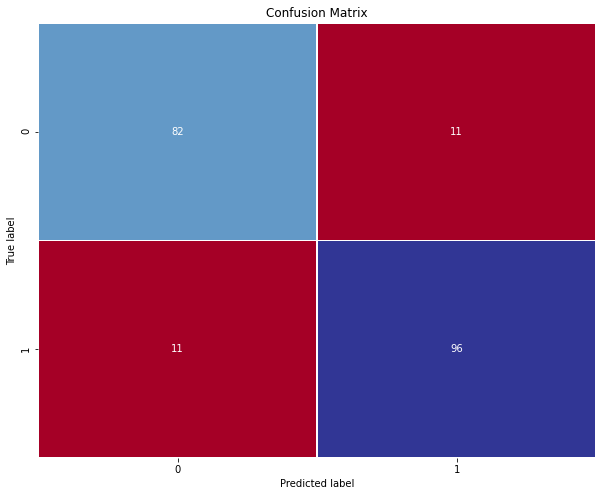

In [ ]:
plt.figure(figsize=[10,8])
sns.heatmap(conf_mat,cmap='RdYlBu',annot=True,cbar=False,linewidths=0.7)
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [ ]:
#check the accuracy metrics on our test data
loss,accuracy = model6.evaluate(X_test,y_test)
print(f"the accuracy of our model is {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8900
the accuracy of our model is 89.00%


In [ ]:
cmy = conf_mat/conf_mat.sum(axis=1)[:,np.newaxis]
cmy

array([[0.88172043, 0.11827957],
       [0.10280374, 0.89719626]])

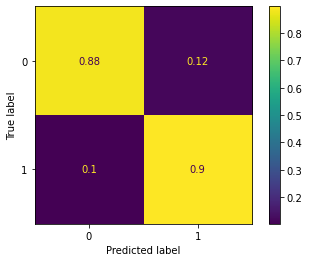

In [ ]:
disp = ConfusionMatrixDisplay(cmy,display_labels=[0,1])
disp.plot()

In [ ]:
13:36

(0.8817204301075269, 0.11827956989247312)

In [ ]:
conf_mat/(conf_mat.sum(axis=1)[:,np.newaxis])

array([[0.88172043, 0.11827957],
       [0.10280374, 0.89719626]])

In [ ]:
l1 = [x for x in range(1,6)]
l2 = [i for i in range(7,12)]
l1,l2

([1, 2, 3, 4, 5], [7, 8, 9, 10, 11])

In [ ]:
t = list(map(lambda x,y: x*y,l1,l2))
t

[7, 16, 27, 40, 55]

In [ ]:
import itertools

In [ ]:
list(itertools.product(l1,l2))

[(1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11)]

In [ ]:
def plot_conf_mat(y_true,y_predy,k=False):
  import itertools
  from sklearn.metrics import confusion_matrix

  figsize=[10,10]

  cm = confusion_matrix(y_true,tf.round(y_predy))
  cm_norm = cm.astype("float")/(cm.sum(axis=1)[:,np.newaxis])
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  
  cax = ax.matshow(cm,cmap="Blues")
  fig.colorbar(cax)

  classes = k

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks = np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)
  
  threshold = (cm.max() + cm.min())/2.

  for i,j in itertools.product(np.arange(cm.shape[0]),np.arange(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({(cm_norm[i,j]*100):.1f}%)",
             horizontalalignment="center",
             color = "white" if cm[i,j] > threshold else "black",
             size=15)


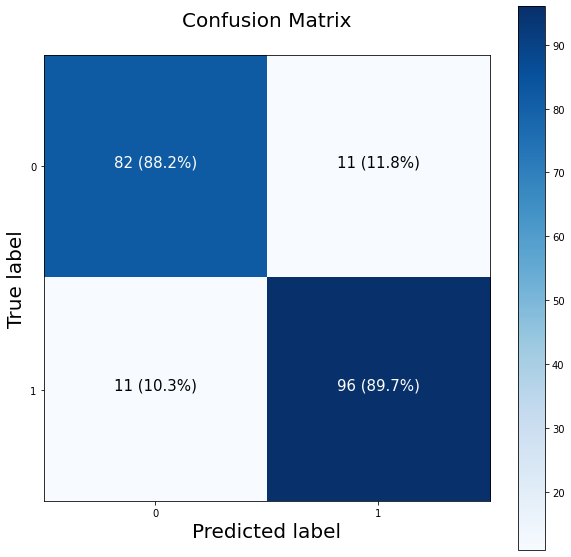

In [ ]:
plot_conf_mat(y_test,tf.round(model6.predict(X_test)))

### Working with multiclass classification

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

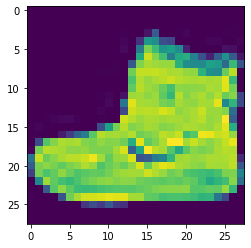

In [ ]:
#let's visualize our data
plt.imshow(X_train[0])
plt.show()

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_labels[y_train[0]]

'Ankle boot'

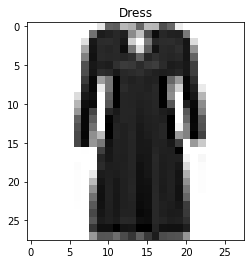

In [ ]:
#visualize again!!
index_of_choice = 488
plt.imshow(X_train[index_of_choice],cmap="binary")
plt.title(class_labels[y_train[index_of_choice]]);

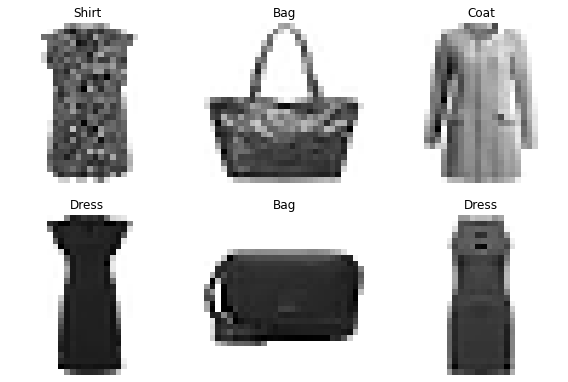

In [ ]:
#visualize random pics
import random
plt.figure(figsize=[10,10])
for i in range(6):
  ax = plt.subplot(3,3,i+1)
  rando = random.choice(range(len(X_train)))
  plt.imshow(X_train[rando],cmap="binary")
  plt.title(class_labels[y_train[rando]])
  plt.axis(False)

watch vid 26

In [ ]:
X_trai,X_val,y_trai,y_val = train_test_split(X_train,y_train)

In [ ]:
tf.random.set_seed(42)
#create the model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")
])
#compile our model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = "Adam",
                metrics=["accuracy"])#used sparse categorical since our labels are not encoded

#fit the model
history8 = model_8.fit(X_trai,y_trai,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 2.2437 - accuracy: 0.1487 - val_loss: 1.8665 - val_accuracy: 0.1948
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.7894 - accuracy: 0.2341 - val_loss: 1.7398 - val_accuracy: 0.2755
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6993 - accuracy: 0.2715 - val_loss: 1.6673 - val_accuracy: 0.2810
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6545 - accuracy: 0.2870 - val_loss: 1.6406 - val_accuracy: 0.3045
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6418 - accuracy: 0.2935 - val_loss: 1.6332 - val_accuracy: 0.2792
Epoch 6/20
1407/1407 [==============================] - 2s 2ms/step - loss: 1.6193 - accuracy: 0.3018 - val_loss: 1.6173 - val_accuracy: 0.3119
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6103 - accuracy: 0.3080 - val_loss: 1.6012 - val_accuracy:

if we had our label variables one hot encoded with `tf.one_hot()` we would use categoricalcrossentropy as our loss function

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_trai.max(),X_trai.min()

(255, 0)

In [ ]:
#let's normalize(standardize our data)
X_train_sc = X_trai/255.0
X_val_sc = X_val/255.0
X_test_sc = X_test/255.0

In [ ]:
tf.random.set_seed(42)
#create the model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")
])
#compile our model
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = "Adam",
                metrics=["accuracy"])#used sparse categorical since our labels are not encoded

#fit the model
history9 = model_9.fit(X_train_sc,y_trai,epochs=20,validation_data=(X_val_sc,y_val))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.0732 - accuracy: 0.6203 - val_loss: 0.7329 - val_accuracy: 0.7399
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6886 - accuracy: 0.7564 - val_loss: 0.6421 - val_accuracy: 0.7731
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6430 - accuracy: 0.7712 - val_loss: 0.6330 - val_accuracy: 0.7689
Epoch 4/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.6209 - accuracy: 0.7759 - val_loss: 0.6284 - val_accuracy: 0.7873
Epoch 5/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.6069 - accuracy: 0.7801 - val_loss: 0.6150 - val_accuracy: 0.7739
Epoch 6/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.5954 - accuracy: 0.7847 - val_loss: 0.5889 - val_accuracy: 0.7924
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5869 - accuracy: 0.7869 - val_loss: 0.5920 - val_accuracy:

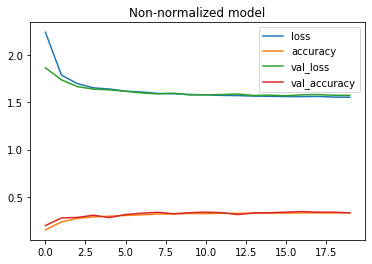

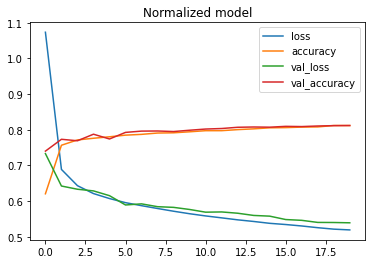

In [ ]:
#let's visualize our models performance
pd.DataFrame(history8.history).plot(title="Non-normalized model")

pd.DataFrame(history9.history).plot(title="Normalized model")

### Finding the perfect learning rate

In [ ]:
tf.random.set_seed(42)
#create the model
model_10 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")
])
#compile our model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = "Adam",
                metrics=["accuracy"])#used sparse categorical since our labels are not encoded

#fit the model
lr_sch = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
history10 = model_10.fit(X_train_sc,y_trai,epochs=30,validation_data=(X_val_sc,y_val),callbacks=[lr_sch])

Epoch 1/30
1407/1407 [==============================] - 4s 2ms/step - loss: 1.2427 - accuracy: 0.5788 - val_loss: 0.7606 - val_accuracy: 0.7445
Epoch 2/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.7018 - accuracy: 0.7474 - val_loss: 0.6461 - val_accuracy: 0.7639
Epoch 3/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6444 - accuracy: 0.7677 - val_loss: 0.6210 - val_accuracy: 0.7760
Epoch 4/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6183 - accuracy: 0.7766 - val_loss: 0.6112 - val_accuracy: 0.7813
Epoch 5/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6034 - accuracy: 0.7822 - val_loss: 0.5918 - val_accuracy: 0.7905
Epoch 6/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5937 - accuracy: 0.7863 - val_loss: 0.6164 - val_accuracy: 0.7753
Epoch 7/30
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5874 - accuracy: 0.7875 - val_loss: 0.5819 - val_accuracy:

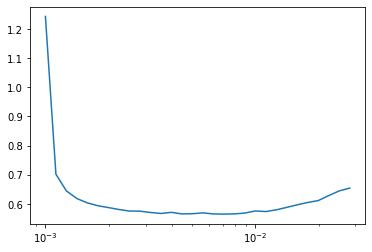

In [ ]:
#let's visualize how the learning rates change our model
lr = 1e-3*10**(tf.range(30)/20)
plt.semilogx(lr,pd.DataFrame(history10.history)["loss"])

In [ ]:
tf.random.set_seed(42)
#create the model
model_11 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")
])
#compile our model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])#used sparse categorical since our labels are not encoded

#fit the model
#lr_sch = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
history11 = model_11.fit(X_train_sc,y_trai,epochs=20,validation_data=(X_val_sc,y_val))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 1.0732 - accuracy: 0.6203 - val_loss: 0.7329 - val_accuracy: 0.7399
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6886 - accuracy: 0.7564 - val_loss: 0.6421 - val_accuracy: 0.7731
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6430 - accuracy: 0.7712 - val_loss: 0.6330 - val_accuracy: 0.7689
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6209 - accuracy: 0.7759 - val_loss: 0.6284 - val_accuracy: 0.7873
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.6069 - accuracy: 0.7801 - val_loss: 0.6150 - val_accuracy: 0.7739
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5954 - accuracy: 0.7847 - val_loss: 0.5889 - val_accuracy: 0.7924
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5869 - accuracy: 0.7869 - val_loss: 0.5920 - val_accuracy:

### Let's evaluate our model

In [ ]:
def plot_conf_mat(y_true,y_predy,classes=None,text_size=12,fig=[10,10]):
  import itertools
  from sklearn.metrics import confusion_matrix

  figsize=fig

  cm = confusion_matrix(y_true,tf.round(y_predy))
  cm_norm = cm.astype("float")/(cm.sum(axis=1)[:,np.newaxis])
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize=figsize)
  
  cax = ax.matshow(cm,cmap="Blues")
  fig.colorbar(cax)

  #classes = False

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks = np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  
  threshold = (cm.max() + cm.min())/2.

  for i,j in itertools.product(np.arange(cm.shape[0]),np.arange(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({(cm_norm[i,j]*100):.1f}%)",
             horizontalalignment="center",
             color = "white" if cm[i,j] > threshold else "black",
             size=text_size-4)


In [ ]:
#calculate y_probs
y_probs = model_11.predict(X_test_sc)
y_probs[0],tf.argmax(y_probs[0]),class_labels[tf.argmax(y_probs[0])]

(array([2.1558998e-11, 8.2293500e-14, 8.8432478e-10, 3.1777898e-07,
        9.6640569e-12, 4.2036965e-01, 1.3237260e-09, 5.5682547e-02,
        1.9488166e-06, 5.2394551e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
y_preds = tf.argmax(y_probs,axis=1).numpy()
y_preds

array([9, 2, 1, ..., 8, 1, 5])

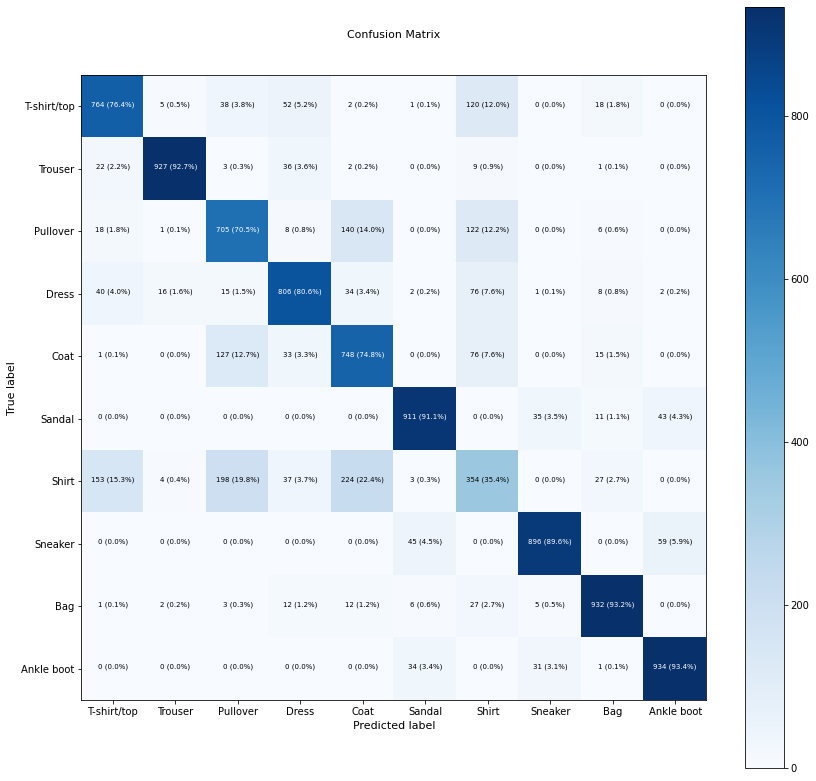

In [ ]:
plot_conf_mat(y_true=y_test,y_predy=y_preds,classes=class_labels,text_size=11,fig=[14,14])

### More visualization

In [ ]:
def plot_random_image(model,images,y_true,classes):
  import random

  i = random.randint(0,len(images))

  rand_img = images[i]
  pred_prob = model.predict(rand_img.reshape(1,28,28))
  pred_class = classes[pred_prob.argmax()]
  true_class = classes[y_true[i]]

  plt.imshow(rand_img)
  if pred_class == true_class:
    color = "green"
  else:
    color = "magenta"

  plt.xlabel("True:{}   predicted:{} {:.2f}%".format(true_class,pred_class,(pred_prob.max()*100)),color=color)

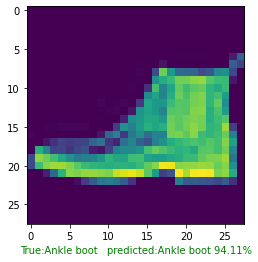

In [ ]:
plot_random_image(model_11,X_test_sc,y_test,class_labels)

### What patterns is our model learning

In [ ]:
model_11.layers

In [ ]:
#let's view the weights and biases of our first dense layer
weights,biases = model_11.layers[1].get_weights()
weights,weights.shape

(array([[ 0.38031748, -0.04636721,  0.19771522, -0.40097773],
        [ 0.3649363 ,  0.3906023 ,  0.16176313, -0.6914726 ],
        [ 0.25281134,  0.2934255 , -0.36835155, -0.78931314],
        ...,
        [ 0.23578934,  0.3302535 , -1.1923305 ,  0.20672964],
        [ 0.4797818 ,  0.8760314 , -1.0433341 , -0.0450499 ],
        [-0.01087725, -0.12247216, -0.3890514 , -0.01435515]],
       dtype=float32), (784, 4))

In [ ]:
#let's view the design of our model
model_11.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


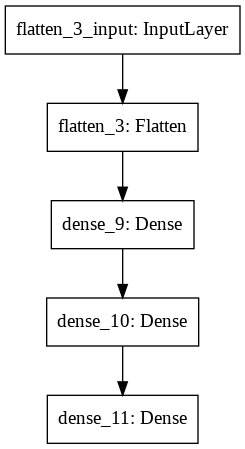

In [ ]:
from tensorflow.keras.utils import plot_model


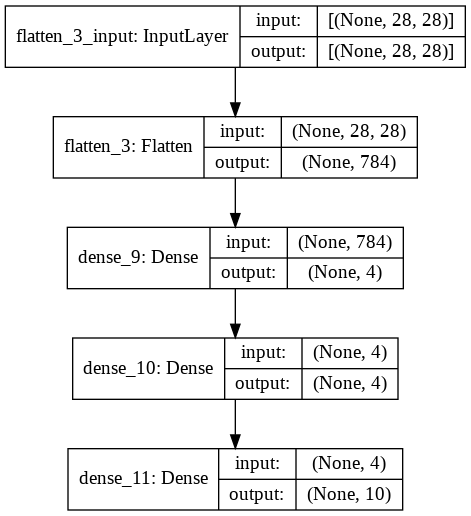

In [ ]:
plot_model(model_11,show_shapes=True)